# Init


In [1]:
!pip install transformers
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline
magic_model = "google/vit-base-patch16-224"
magic_data = "detection-datasets/fashionpedia"

pipe = pipeline("image-classification", model=magic_model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [3]:
import os
from datasets import load_dataset
dataset = load_dataset (magic_data, split='train')
testing = load_dataset (magic_data, split='val')


README.md:   0%|          | 0.00/5.22k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

(…)-00000-of-00007-fe108070118553c3.parquet:   0%|          | 0.00/482M [00:00<?, ?B/s]

(…)-00001-of-00007-f41a5a9c38c9005b.parquet:   0%|          | 0.00/480M [00:00<?, ?B/s]

(…)-00002-of-00007-40bc8456894bcbcd.parquet:   0%|          | 0.00/480M [00:00<?, ?B/s]

(…)-00003-of-00007-9a99ff8dc572e02c.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

(…)-00004-of-00007-f4e6f12cd2cedfea.parquet:   0%|          | 0.00/488M [00:00<?, ?B/s]

(…)-00005-of-00007-41d8dfe1edb6591e.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

(…)-00006-of-00007-f41b0f2f4bbefac9.parquet:   0%|          | 0.00/487M [00:00<?, ?B/s]

(…)-00000-of-00001-0b29e85429788213.parquet:   0%|          | 0.00/84.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45623 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/1158 [00:00<?, ? examples/s]

# Data Collection

In [4]:
dataset = dataset.train_test_split (test_size = 0.01)

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 45166
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 457
    })
})

In [6]:
dataset['train'].features

{'image_id': Value(dtype='int64', id=None),
 'image': Image(mode=None, decode=True, id=None),
 'width': Value(dtype='int64', id=None),
 'height': Value(dtype='int64', id=None),
 'objects': Sequence(feature={'bbox_id': Value(dtype='int64', id=None), 'category': ClassLabel(names=['shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel'], id=None), 'bbox': Sequence(feature=Value(dtype='float64', id=None), length=4, id=None), 'area': Value(dtype='int64', id=None)}, length=-1, id=None)}

{'whiskers': [<matplotlib.lines.Line2D at 0x7bbf81642050>,
 'caps': [<matplotlib.lines.Line2D at 0x7bbf81641cf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bbf81643b50>],
 'medians': [<matplotlib.lines.Line2D at 0x7bbf80f18520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bbf80f18340>],
 'means': []}

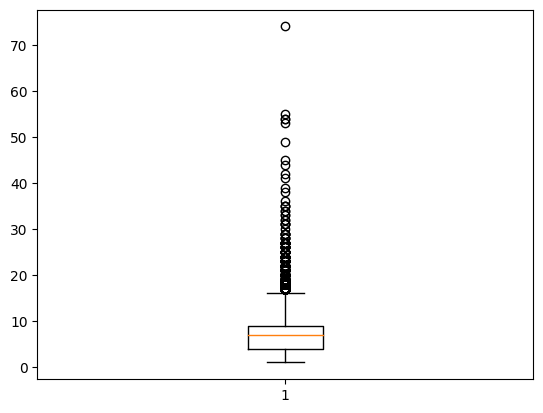

In [7]:
import matplotlib.pyplot as plt

data = dataset['train'].flatten()
data = data.remove_columns (['image_id', 'width', 'height', 'objects.bbox_id','objects.area', 'objects.bbox'])
max_length = {index: len(value) for index, value in enumerate(data['objects.category'])}
plt.boxplot(max_length.values())



{'whiskers': [<matplotlib.lines.Line2D at 0x7bbf80f75c00>,
 'caps': [<matplotlib.lines.Line2D at 0x7bbf80f76140>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bbf80f75960>],
 'medians': [<matplotlib.lines.Line2D at 0x7bbf80f76680>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bbf80f76920>],
 'means': []}

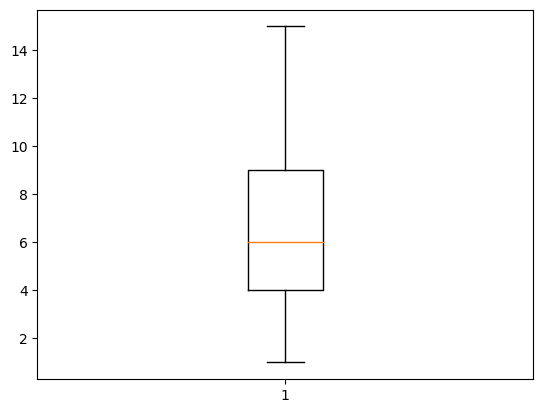

In [8]:
filtered = {index: length for index, length in max_length.items() if length < 16}
plt.boxplot(filtered.values())

In [9]:
filtered_keys = list (filtered.keys())
filter_data = data.select (filtered_keys)
filter_data

Dataset({
    features: ['image', 'objects.category'],
    num_rows: 43592
})

In [10]:
filter_data = filter_data.filter (lambda example : example['image'].mode == "RGB")

Filter:   0%|          | 0/43592 [00:00<?, ? examples/s]

# Practice

In [11]:
def preprocess(x):
  data = x.flatten()
  data = data.remove_columns (['image_id', 'width', 'height', 'objects.bbox_id','objects.area', 'objects.bbox'])
  max_length = {index: len(value) for index, value in enumerate(data['objects.category'])}
  filtered = {index: length for index, length in max_length.items() if length < 16}
  filtered_keys = list (filtered.keys())
  filter_data = data.select (filtered_keys)
  data = filter_data.filter (lambda example : example['image'].mode == "RGB")

  return data

In [12]:
test = preprocess(dataset['test'])

Filter:   0%|          | 0/438 [00:00<?, ? examples/s]

# Pre Processing


In [13]:
import tensorflow as tf
from keras import layers
from transformers import ViTImageProcessor

feature_extract = ViTImageProcessor.from_pretrained(magic_model)
max_val = max(max(lst) for lst in filter_data['objects.category'])

In [14]:
max_val

45

In [15]:
def hot_encoding (data, max_val) :

    final = []
    transform = [x for x in data]
    #print (transform)
    oho= [0] * (max_val +1)
    for lst in transform:
        oho[lst] = 1
    final =tf.convert_to_tensor(oho)
    #if final.shape[0] < 20 :
        #final = tf.pad (final,[[0,(20 - final.shape[0])], [0,0]], mode='CONSTANT')
    return final

#filter_data = process_image (filter_data)

In [16]:
filter_data[2]['objects.category']

[6, 32, 23, 23, 1, 33, 32, 31, 31, 24, 13]

In [17]:
print (hot_encoding(filter_data[2]['objects.category'], max_val))

tf.Tensor(
[0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0], shape=(46,), dtype=int32)


In [18]:
# Load model directly
from transformers import AutoImageProcessor, TFViTModel

processor = AutoImageProcessor.from_pretrained(magic_model)
models = TFViTModel.from_pretrained (magic_model, trainable=False)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should

In [19]:
# define loss
from transformers import create_optimizer
import tensorflow as tf



num_train_epochs = 2
train_batch_size = 32
eval_batch_size = 32
learning_rate = 3e-3
weight_decay_rate=0.01
num_warmup_steps=0

# create optimizer wight weigh decay
num_train_steps = len(filter_data) * num_train_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=learning_rate,
    num_train_steps=num_train_steps,
    weight_decay_rate=weight_decay_rate,
    num_warmup_steps=num_warmup_steps,
)

loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)

# define metrics
metrics=[
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.BinaryCrossentropy(name="binary crossentropy"),
]


In [20]:
for layer in models.layers :
  layer.trainable = False

In [21]:
import keras


inputs = tf.keras.layers.Input(shape=(3,224,224), name='pixel_values', dtype='float32')
vit = models.vit(inputs)[0]
pool = tf.keras.layers.AveragePooling1D(158,strides=1)(vit)
c1 = tf.keras.layers.Conv1D(filters=512,kernel_size=1, strides=1)(pool)
c2 = tf.keras.layers.Conv1D(filters=256,kernel_size=1, strides=1)(c1)
c3 = tf.keras.layers.Conv1D(filters=128,kernel_size=1, strides=1)(c2)
c4 = tf.keras.layers.GlobalAveragePooling1D () (c3)
d1= tf.keras.layers.Dense (128, activation="relu")(c4)
d2 = tf.keras.layers.Dense (128, activation="relu")(d1)
d3 = tf.keras.layers.Dense (64, activation="relu")(d2)
final = tf.keras.layers.Dense (46, activation="softmax")(d3)
keras_model = tf.keras.Model(inputs=inputs, outputs=final)

In [22]:
print (keras_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pixel_values (InputLayer)   [(None, 3, 224, 224)]     0         
                                                                 
 vit (TFViTMainLayer)        TFBaseModelOutputWithPo   86389248  
                             oling(last_hidden_state             
                             =(None, 197, 768),                  
                              pooler_output=(None, 7             
                             68),                                
                              hidden_states=None, at             
                             tentions=None)                      
                                                                 
 average_pooling1d (Average  (None, 40, 768)           0         
 Pooling1D)                                                      
                                                             

In [23]:
print(filter_data[0]['image'])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=471x1024 at 0x7BBF81551330>


In [24]:
import numpy as np
class Datagen (tf.keras.utils.Sequence) :
    def __init__(self,data, batch_size=32):


        self.data = data
        self.batch_size = batch_size
        self.n =len(self.data)

    def on_epoch_end(self):
        pass

    def __getinput (self,data) :
        image =feature_extract(data)
        image = image['pixel_values']
        image = np.squeeze (image,axis=0)
        return image

    def __getoutput (self,data) :
        data = hot_encoding(data, max_val)
        #print (data.shape)
        return data

    def __get_data (self,batches) :
        x_batch = np.asarray ([self.__getinput(x) for x in batches['image']])
        y_batch = np.asarray ([self.__getoutput(x) for x in batches['objects.category']])
        #print (y_batch.shape)

        return x_batch, y_batch

    def __getitem__(self, index):

        batches = self.data[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__get_data(batches)
        return X, y

    def __len__(self):
        return self.n // self.batch_size

In [25]:
traingen = Datagen (filter_data)
valgen = Datagen (test)

In [36]:
# import os
# from transformers.keras_callbacks import PushToHubCallback
# from keras.callbacks import TensorBoard as TensorboardCallback, EarlyStopping

# callbacks=[]
# output_dir='./'
# callbacks.append(TensorboardCallback(log_dir=os.path.join(output_dir,"logs")))
# callbacks.append(EarlyStopping(monitor="val_accuracy",patience=1))

In [38]:
import os
#Import TensorBoard from tf_keras.callbacks instead of keras.callbacks
from transformers.keras_callbacks import PushToHubCallback
from tf_keras.callbacks import TensorBoard as TensorboardCallback, EarlyStopping

callbacks=[]
output_dir='./'
callbacks.append(TensorboardCallback(log_dir=os.path.join(output_dir,"logs")))
callbacks.append(EarlyStopping(monitor="val_accuracy",patience=1))

In [39]:
keras_model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics
              )

train_results = keras_model.fit(
    traingen,
    validation_data=valgen,
    callbacks=callbacks,
    epochs=num_train_epochs,
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/tf_keras/src/backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1356/1356 [==============================] - 797s 570ms/step - loss: 0.1859 - accuracy: 0.9000 - binary crossentropy: 0.1859 - val_loss: 0.1802 - val_accuracy: 0.9042 - val_binary crossentropy: 0.1802
Epoch 2/2
1356/1356 [==============================] - 734s 541ms/step - loss: 0.1711 - accuracy: 0.9009 - binary crossentropy: 0.1711 - val_loss: 0.1673 - val_accuracy: 0.9023 - val_binary crossentropy: 0.1673


In [34]:
# import tensorflow as tf
# print(tf.__version__)

2.17.0


In [35]:
# pip install --upgrade tensorflow

In [42]:
test_data = preprocess(testing)

Filter:   0%|          | 0/1129 [00:00<?, ? examples/s]

In [43]:
input_test= feature_extract(test_data[4]['image'])
input_test = input_test['pixel_values']
input_test[0]

array([[[ 0.4039216 ,  0.35686278,  0.41960788, ...,  0.14509809,
          0.09803927,  0.06666672],
        [ 0.37254906,  0.4039216 ,  0.3803922 , ...,  0.1686275 ,
          0.14509809,  0.07450986],
        [ 0.36470592,  0.4666667 ,  0.5686275 , ...,  0.16078436,
          0.15294123,  0.07450986],
        ...,
        [-0.00392157, -0.04313725, -0.04313725, ..., -0.02745098,
         -0.06666666, -0.05882353],
        [-0.02745098, -0.05882353, -0.02745098, ...,  0.00392163,
         -0.05098039, -0.0745098 ],
        [-0.03529412, -0.05882353, -0.04313725, ...,  0.02745104,
         -0.05098039, -0.08235294]],

       [[ 0.45882356,  0.5058824 ,  0.5137255 , ...,  0.1686275 ,
          0.12156868,  0.09019613],
        [ 0.47450984,  0.4901961 ,  0.5294118 , ...,  0.19215691,
          0.1686275 ,  0.09803927],
        [ 0.45882356,  0.38823533,  0.18431377, ...,  0.18431377,
          0.17647064,  0.09803927],
        ...,
        [ 0.0196079 , -0.01960784, -0.01960784, ..., -

In [44]:
input_test= feature_extract(test_data[4]['image'])
input_test = input_test['pixel_values']
input_test = input_test[0]
input_test = np.expand_dims(input_test,axis=0)
result = keras_model.predict(input_test)
print (result)

1/1 [==============================] - 3s 3s/step
[[0.0091743  0.06692881 0.00579778 0.00567964 0.01083296 0.00305503
  0.02668294 0.01734943 0.01004965 0.0056944  0.02357327 0.00322837
  0.00178647 0.01101217 0.01168789 0.01067315 0.00084212 0.00361995
  0.00729047 0.00824808 0.0015562  0.01146052 0.0083691  0.17393857
  0.01063485 0.00655647 0.00049383 0.00738268 0.01339395 0.00504561
  0.00099602 0.31241104 0.02608908 0.14543311 0.00408384 0.00752526
  0.00436949 0.00186794 0.00097435 0.00085108 0.00187284 0.00062376
  0.00458857 0.00422654 0.0015564  0.00049207]]


In [45]:
print ((result*100).astype(int))

[[ 0  6  0  0  1  0  2  1  1  0  2  0  0  1  1  1  0  0  0  0  0  1  0 17
   1  0  0  0  1  0  0 31  2 14  0  0  0  0  0  0  0  0  0  0  0  0]]


In [46]:
keras_model.save('multiclass.keras')

In [47]:
dataset['train'].features
objects_list = dataset['train'].features.flatten()
result.shape

(1, 46)

In [48]:
objects_list['objects.category'].feature.names[45]

'tassel'